<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/main/211110_Student_Pass_Fail_Data_Bruno_Tucci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Research Question:**

BT: The research questions that will be addressed in this analysis are (1) Whether a student's ability to pass is correlated with the the student's number of hours of self-study or (2) the student's monthly tuition, or (3) whether the combined variables of hours of self-study and monthly tuition can be used in a logistic regression model to predict whether a student will pass or fail. 

# **Task 1: Environment Set Up**

In [2]:
#import libraries
import numpy as np
import pandas as pd

# **Task 2: Data Collection**

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
df1 = pd.read_csv('/content/drive/MyDrive/Student-Pass-Fail-Data.csv')

In [ ]:
df1.head

<bound method NDFrame.head of          Date  ... People Not-Positive - Unknown Race/Ethnicity
0    3/1/2020  ...                                            0
1    3/2/2020  ...                                            4
2    3/3/2020  ...                                           20
3    3/4/2020  ...                                           20
4    3/5/2020  ...                                            7
..        ...  ...                                          ...
83  5/25/2020  ...                                          602
84  5/26/2020  ...                                         2692
85  5/27/2020  ...                                         2401
86  5/28/2020  ...                                         2155
87  5/31/2020  ...                                          551

[88 rows x 59 columns]>

In [8]:
df1.shape

(1000, 3)

BT: Data for 1,000 students will be studied. 

In [9]:
df1.describe

<bound method NDFrame.describe of      Self_Study_Daily  Tution_Monthly  Pass_Or_Fail
0                   7              27             1
1                   2              43             0
2                   7              26             1
3                   8              29             1
4                   3              42             0
..                ...             ...           ...
995                 6              22             1
996                 9              30             1
997                 3              39             0
998                 7              25             1
999                 5              37             0

[1000 rows x 3 columns]>

In [10]:
df1.isnull().sum()

Self_Study_Daily    0
Tution_Monthly      0
Pass_Or_Fail        0
dtype: int64

BT: There are no null values in the updated .csv data file. 

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Self_Study_Daily  1000 non-null   int64
 1   Tution_Monthly    1000 non-null   int64
 2   Pass_Or_Fail      1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


BT: The figures in the .csv file are all integers.

# Task 3: Data Wrangling and Exploratory Data Analysis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


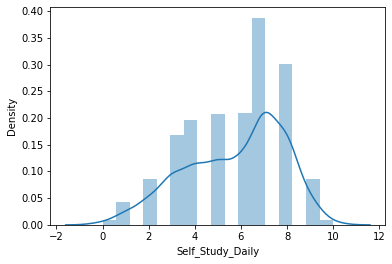

In [13]:

sns.distplot(df1['Self_Study_Daily'])

BT: This is a distribution plot of the number of hours of daily self study for different students.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


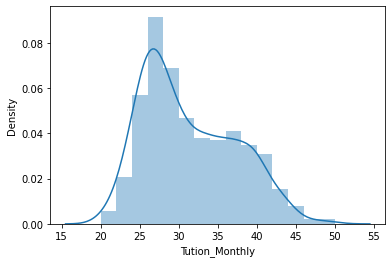

In [18]:
sns.distplot(df1['Tution_Monthly'])

BT: This is a distribution of the monthly tuition of the different students.

In [ ]:
#Positive_17 = df1['People Positive - Age 0-17']

#Positive_29 = df1['People Positive - Age 18-29']





BT: This is a line plot of the number of Covid cases for people aged 80 and older, shown by day of the month from March 1st, 2020 to May 31st, 2020. 

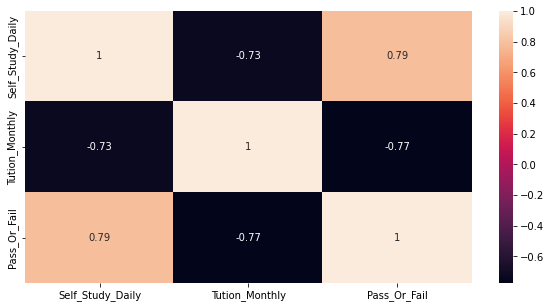

In [20]:
plt.figure(figsize=(10, 5))
sns.heatmap(df1.corr(), annot=True)

BT: Pas_Or_Fail is strongly correlated with Self_Study_Daily (.79) and negatively correlated with Tuition_Monthly (-.77). 

## Task 4: Preparing the data for training the Machine Learning Model

In [22]:
df2 = df1[['Tution_Monthly', 'Self_Study_Daily']]
df2.head()

,Tution_Monthly,Self_Study_Daily
0,27,7
1,43,2
2,26,7
3,29,8
4,42,3


In [25]:
X_features = df2
Y_target = df1['Pass_Or_Fail']

In [26]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

## Task 5: Model Training

In [27]:
# import linear model - the estimator
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_features, Y_target)

In [28]:
logReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logReg.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1])

## Task 6: Model Evaluation

In [31]:
logReg.score(x_test, y_test)

0.98

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[119,   4],
       [  1, 126]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       123
           1       0.97      0.99      0.98       127

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [34]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'predicted value')

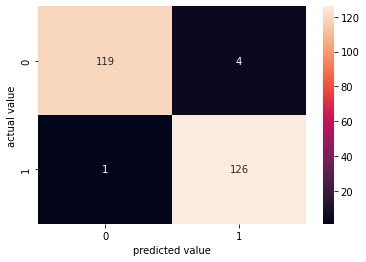

In [35]:
sns.heatmap(cm, annot=True, fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')

## Conclusions
BT: The two x variables combined, Self_Study_Daily and Tution_Monthly were 98% accurate in predicting whether a student would pass or fail. That's (119 + 126)/(119 + 4 + 1 + 126) = .98, or (TN + TP)/(TN + FP + FN +TP)

The True Positive Rate was 119/(119 + 4) = .97, as indicated by 0 recall in the classification report. 

The True Negative Rate was 126/(1 + 126) = .99, as indicated by the 1 recall in the classification report. 

The average of .97 and .99 is .98, and this .98 is the Macro Average of Accuracy in the classification report. 

The machine learning model, with an accuracy of .98 was more accurate than Tuition_Monthly (-.77) or Self_Study_Daily (.79) in predicting whether a student would pass or fail.

